In [ ]:
import statsmodels.api as sm

In [1]:
import matplotlib.pyplot as plt
import numpy as np

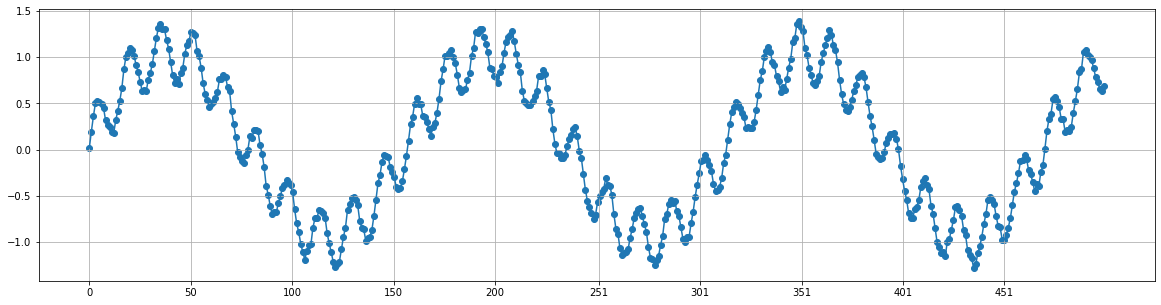

In [46]:
xs = np.linspace(0, 500, 500)
ys = np.sin(0.04*xs) + 0.3*np.sin(0.4*xs) + 0.1*np.random.random(size=500)

plt.figure(figsize=(20,5))
plt.plot(xs, ys)
plt.scatter(xs, ys)
plt.xticks([round(x) for x in xs[::50]])
plt.grid(True)
plt.show()

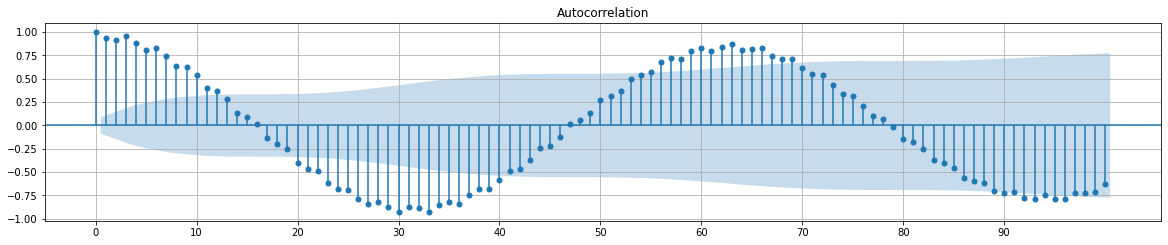

In [20]:
num = 100
fig = plt.figure(figsize=(20,8))

ax1 = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(ys, lags=num, ax=ax1)
ax1.set_xticks(range(num)[::10])
ax1.grid(True)

plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
ax.add_artist(plt.Circle((0,0), 2, color='b'))
plt.show()

In [ ]:
import numpy as np

In [ ]:
idxs = np.arange(5)
np.random.shuffle(idxs)
idxs

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
xs = np.array([1,2,3])
ys = np.array([1,2,3])
model = LinearRegression().fit(xs.reshape(-1,1), ys)

In [ ]:
model.predict([[3]])

# Нестационарность

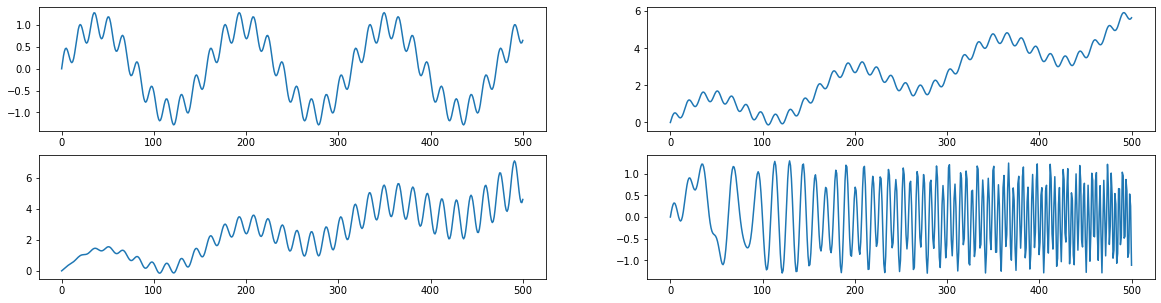

In [186]:
xs = np.linspace(0, 500, 500)
ys1 = np.sin(0.04*xs) + 0.3*np.sin(0.4*xs)
ys2 = np.sin(0.04*xs) + 0.3*np.sin(0.4*xs) + xs/100
ys3 = np.sin(0.04*xs) + xs/100*0.3*np.sin(0.4*xs)  + xs/100
ys4 = np.sin((0.04*xs)**2) + 0.3*np.sin(0.4*xs)

plt.figure(figsize=(20,5))
plt.subplot(221)
plt.plot(xs, ys1)
plt.subplot(222)
plt.plot(xs, ys2)
plt.subplot(223)
plt.plot(xs, ys3)
plt.subplot(224)
plt.plot(xs, ys4)
plt.show()

In [187]:
import statsmodels.api as sm
for ys in [ys1, ys2, ys3, ys4]:
    print(sm.tsa.stattools.adfuller(ys)[1])

0.0
0.9516923289708361
0.9597604981232908
0.01525346833489069


In [115]:
sm.tsa.stattools.adfuller(ys3)

(-38892346342.656,
 0.0,
 3,
 496,
 {'1%': -3.4436029548776395,
  '5%': -2.867384756137026,
  '10%': -2.5698830308597813},
 -26338.16847906371)

# SARIMA

In [136]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
model = SARIMAX(ys1+5, order=(0,0,0))
model.fit()

plt.scatter(xs, model.predict(ys1))
plt.show()

# Аномалии во временных рядах

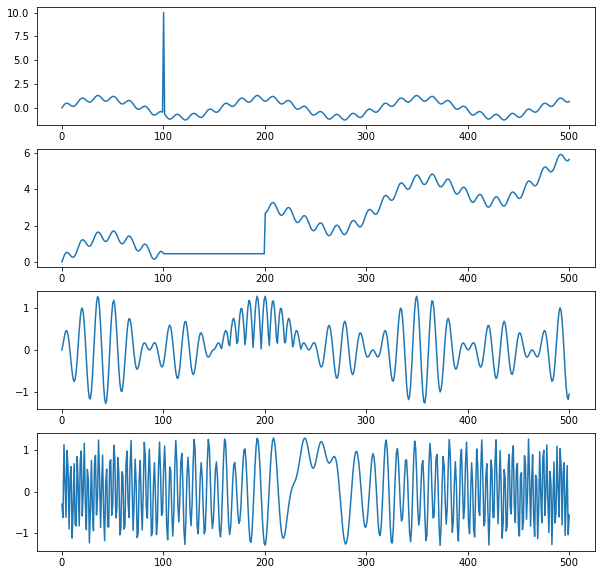

In [164]:
xs = np.linspace(0, 500, 500)
ys1 = np.sin(0.04*xs) + 0.3*np.sin(0.4*xs)
ys1[100] = 10
ys2 = np.sin(0.04*xs) + 0.3*np.sin(0.4*xs) + xs/100
ys2[100:200] = ys2[100]
ys3 = np.sin(0.04*xs)*np.sin(0.4*xs) + 0.3*np.sin(0.4*xs)
ys3[150:250] = np.abs(ys3[150:250])
ys4 = np.sin((0.04*(-(0.1*(xs-250)**2+10000)))) + 0.3*np.sin(0.4*xs)

plt.figure(figsize=(10,10))
plt.subplot(411); plt.plot(xs, ys1)
plt.subplot(412); plt.plot(xs, ys2)
plt.subplot(413); plt.plot(xs, ys3)
plt.subplot(414); plt.plot(xs, ys4)
plt.show()

# Расстояние Вассерштайна